In [16]:
import sys
sys.path.append("../src")
from utils import *

In [17]:
adata = sc.read(os.path.join(datadir, "anca_samples_annotated_v2.h5ad"))

In [18]:
keep_clusters = ["Normal glomerular", "Inflamed glomerular", "Tubulointerstitial", "Vasculature", 
                 "Inflamed tubulointerstitial"]
tubule_clusters = []
for cluster in adata.obs.cluster_annot.unique():
    if cluster not in keep_clusters:
        tubule_clusters.append(cluster)
broad_mapping = dict(zip(tubule_clusters, ["Tubules"]*len(tubule_clusters)))

adata.obs["cluster_annot_broad"] = adata.obs.cluster_annot.replace(broad_mapping)

In [19]:
sc.set_figure_params(dpi=100)

In [20]:
sns.set(style="ticks", font_scale=1)

import matplotlib
from matplotlib import font_manager
font_dirs = "/usr/share/fonts/truetype/msttcorefonts/"
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

matplotlib.pyplot.rcParams['font.family'] = "arial"    

In [21]:
adata.obs["annot_v2"].value_counts()

Crescent     347
Normal       146
Uncertain     32
Name: annot_v2, dtype: int64

In [22]:
sub = adata[adata.obs["annot_v2"].isin(["Normal", "Crescent"])]
sub = sub.obs[["count_v2", "annot_v2", "cluster_annot"]]

In [23]:
for count in sub.count_v2.unique():
    tmp = sub[sub["count_v2"]==count]
    
    if "Inflamed glomerular" in tmp["cluster_annot"].tolist():
        idxs = tmp.index.tolist()
        sub.loc[idxs, "cluster_annot"] = ["Inflamed glomerular"]*len(idxs)
        
    if "Normal glomerular" in tmp["cluster_annot"].tolist() and \
        "Inflamed glomerular" not in tmp["cluster_annot"].tolist() \
        and "Inflamed" not in tmp["cluster_annot"].tolist():
        idxs = tmp[tmp["count_v2"]==count].index.tolist()
        sub.loc[idxs, "cluster_annot"] = ["Normal glomerular"]*len(idxs)

In [24]:
for count in sub.count_v2.unique():
    tmp = sub[sub["count_v2"]==count]
    all_clst = tmp["cluster_annot"].tolist()
    if "Normal glomerular" in all_clst and "Abnormal glomerular" in all_clst:
        print(count)

In [25]:
tab = pd.crosstab(sub["annot_v2"], sub["cluster_annot"])
tab = tab.div(tab.sum(1),0)*100

row_order = ["Normal", "Crescent"]

col_order = ["PT", "PT/LOH", "PT/DCT", "CNT/PC/IC", "LOH",
             "Vasculature", "Tubulointerstitial", "Normal glomerular", "Inflamed glomerular", 
             "Inflamed tubulointerstitial"]


In [26]:
tab = pd.crosstab(sub["annot_v2"], sub["cluster_annot"])
tab = tab.div(tab.sum(1),0)*100
tab.to_csv(os.path.join(datadir, "anca_samples_tab_image_gene_cluster_annot.csv"))

In [27]:
for col in col_order:
    if col not in tab.columns:
        tab[col] = 0

In [28]:
import pickle
with open(os.path.join(datadir, "cluster_annot_colors.pkl"), "rb") as f:
    colors_dict = pickle.load(f)

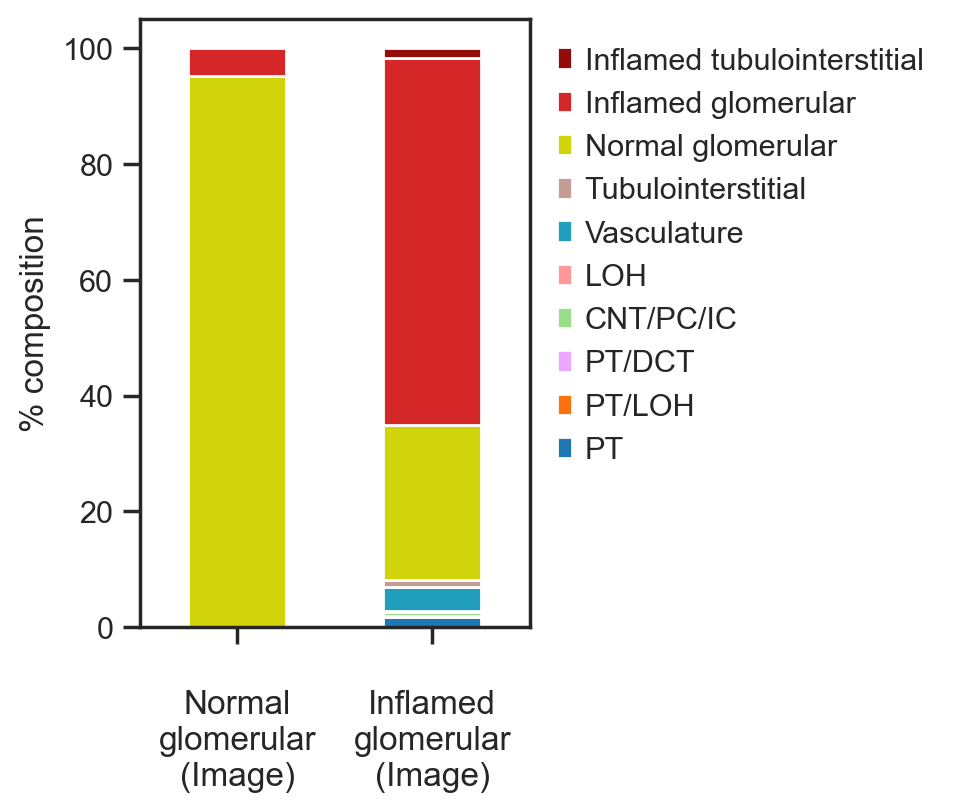

In [29]:
ax = tab.loc[row_order, col_order].plot(kind="bar", stacked=True, figsize=(2.5,4), color=colors_dict)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), frameon=False)

ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel("% composition")

ax.set_xticklabels(["\nNormal\nglomerular\n(Image)", "\nInflamed\nglomerular\n(Image)"], rotation=0, ha="center", fontsize=12)
plt.savefig(os.path.join(figdir, "BARPLOT_anca_samples_image_gene_cluster_annot.pdf"), bbox_inches="tight")

In [15]:
tab = pd.crosstab(sub["annot_v2"], sub["cluster_annot_broad"])
tab = tab.div(tab.sum(1),0)*100

row_order = ["Normal", "Crescent"]
col_order = ["Tubules", "Tubulointerstitial/Vessels", "Tubulointerstitial", "Normal glomerular", "Inflamed glomerular", 
             "Inflamed tubulointerstitial"]

KeyError: 'cluster_annot_broad'

In [ ]:
tab

In [ ]:
tab = pd.crosstab(sub["annot_v2"], sub["cluster_annot_broad"])
tab = tab.div(tab.sum(1),0)*100
tab.to_csv(os.path.join(datadir, "anca_samples_tab_image_gene.csv"))

In [ ]:
for col in col_order:
    if col not in tab.columns:
        tab[col] = 0

In [ ]:
import pickle
with open(os.path.join(datadir, "cluster_annot_broad_colors.pkl"), "rb") as f:
    colors_dict = pickle.load(f)

In [ ]:
ax = tab.loc[row_order, col_order].plot(kind="bar", stacked=True, figsize=(2.5,4), color=colors_dict)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), frameon=False)

ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel("% composition")

ax.set_xticklabels(["\nNormal\nglomerular\n(Image)", "\nInflamed\nglomerular\n(Image)"], rotation=0, ha="center", fontsize=12)
plt.savefig(os.path.join(figdir, "BARPLOT_anca_samples_image_gene.pdf"), bbox_inches="tight")

# check Crescent/Normal glom.

In [ ]:
idxs = []
for count in sub["count_v2"].unique():
    tmp = sub[sub["count_v2"]==count]
    if "Crescent" in tmp["annot_v2"].tolist() and "Inflamed glomerular" not in tmp["cluster_annot_broad"].tolist() \
        and "Normal glomerular" in tmp["cluster_annot_broad"].tolist():
        idxs = idxs + tmp.index.tolist()

In [ ]:
tmp = adata.copy()

In [ ]:
tmp.obs["cluster_annot_tmp"] = tmp.obs["cluster_annot_broad"].tolist()
tmp.obs.loc[idxs, "cluster_annot_tmp"] = ["Normal glomerular in gene\nbut crescent in image annotation"]*len(idxs)

In [ ]:
tmp = tmp[tmp.obs["cluster_annot_tmp"].isin(["Normal glomerular", "Inflamed glomerular", 
                                             "Normal glomerular in gene\nbut crescent in image annotation"])]
tmp.obs["cluster_annot_tmp"] = tmp.obs["cluster_annot_tmp"].astype("category")

In [ ]:
tmp.uns["cluster_annot_tmp_colors"] = ["red", "yellow", "black"]

In [ ]:
sc.pl.umap(tmp, color="cluster_annot_tmp", show=False, title="")
plt.savefig(os.path.join(figdir, "anca_samples_umap_diff_Normal_glomerular_Crescent.pdf"), bbox_inches="tight")

In [ ]:
sc.pp.scale(tmp)

In [ ]:
sc.pl.correlation_matrix(tmp, groupby="cluster_annot_tmp", show=False)
plt.savefig(os.path.join(figdir, "anca_samples_corr_image_gene.pdf"), bbox_inches="tight")

In [ ]:
genes = ["PODXL", "WT1", "NPHS1", "NPHS2", "PTPRC", "CD14", "CD19", "CD3D", "CD4"]

In [ ]:
ax = sc.pl.heatmap(tmp, var_names=genes, groupby="cluster_annot_tmp", use_raw=False, vmin=-2, vmax=2, cmap="plasma", dendrogram=True,
             figsize=(5,5), show=False)
ax["groupby_ax"].set_ylabel("")
plt.savefig(os.path.join(figdir, "anca_samples_heatmap_genediff_Normal_glom._Crescent.pdf"), bbox_inches="tight")

In [ ]:
sns.set(style="ticks", font_scale=1)
# plt.rcParams["font.family"] = ["Inter"]

In [ ]:
ax = sc.pl.dotplot(tmp, var_names=genes, groupby="cluster_annot_tmp", use_raw=False, vmin=-1, vmax=1, cmap="RdBu_r", 
                   dendrogram=True,
             size_title="Fraction of spots \nin group (%)", show=False)
plt.savefig(os.path.join(figdir, "anca_samples_dotplot_genediff_Normal_glom._Crescent.pdf"), bbox_inches="tight")